<a href="https://colab.research.google.com/github/laivietanh1986/MachineLearningExperiment/blob/main/MNIST_Dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load MNIST dataset
# MNIST dataset has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features).
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
mnist = fetch_openml("mnist_784")

In [ ]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)
train_lbl[0:10]
train_img.shape

(60000, 784)

In [ ]:
from tensorflow.keras.utils import to_categorical
train_onehot_lbl = to_categorical(train_lbl,num_classes=10)
test_onehot_lbl = to_categorical(test_lbl,num_classes=10)
train_onehot_lbl[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

input_layer = Input(shape=(784,))
hidden_layer_1 = Dense(300,activation="sigmoid")(input_layer)
hidden_layer_2 = Dense(200,activation="sigmoid")(hidden_layer_1)
hidden_layer_3 = Dense(100,activation="sigmoid")(hidden_layer_2)

dense_layer = Dense(10, activation="softmax")(hidden_layer_3)


model = Model(inputs=input_layer, outputs=dense_layer)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

model.fit(train_img,train_onehot_lbl,validation_data=(test_img,test_onehot_lbl), epochs= 20, batch_size=20)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 200)               60200     
                                                                 
 dense_14 (Dense)            (None, 100)               20100     
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 316,810
Trainable params: 316,810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
3000/3000 [==============================] -

predict number 4


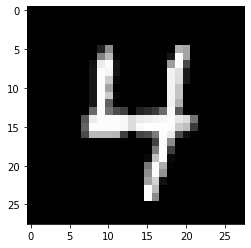

In [ ]:
import numpy as np
predict = model.predict(test_img[1:2])
img_show = test_img[1:2].to_numpy()
plt.imshow(img_show.reshape(28,28),cmap='gray')
print(f'predict number {np.argmax(predict)}')